# **Introduction**

Entanglement is a key feature of quantum computing, and it plays a critical role in many quantum algorithms. In this tutorial, we will explore how to create and manipulate entangled states using Qiskit, a popular open-source quantum computing framework developed by IBM.

Before we begin, it's worth briefly defining what we mean by entanglement. In quantum mechanics, entanglement refers to a state where the properties of two or more particles are correlated in such a way that their joint state cannot be described by the states of the individual particles. This means that measuring the state of one particle instantly affects the state of the other particle, no matter how far apart they are. This effect is sometimes referred to as "spooky action at a distance" and is one of the key features of quantum mechanics.


First let us install qiskit...

In [ ]:
!pip install qiskit[visualization]
!pip install qiskit_aer

...and import relevant libraries for math, to create quantum circuits and visualizing ket vectors.

In [1]:
import qiskit
print(qiskit.__version__)

import numpy as np
import math
from math import pi
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city, plot_distribution
from qiskit.primitives import BackendSampler, StatevectorSampler, StatevectorEstimator
from qiskit_aer import Aer
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import DensityMatrix

1.0.1


## Bell states and the density matrix

The density matrix is a way of representing the state of a quantum system, and it's a useful tool for understanding entangled states. In Qiskit, we can obtain the density matrix of a quantum state using the DensityMatrix() function.

**Exercise 1:** Create a two qubit quantum circuit, use elementary gates to create the state $|\Phi^+\rangle$ and visualize the density matrix of the state by plotting the real and imaginary parts of the density matrix. Initialize the circuit differently to generate the states $|\Phi^-\rangle$, $|\Psi^+\rangle$ and $|\Psi^-\rangle$ (consider that Qiskit inverts the order of bits). Use the plot_state_city function to represent the density matrix.

In [33]:
# Create a quantum circuit with two qubits and initialize it

circuit1 = QuantumCircuit(2)
circuit1.initialize([1,0,0,1], normalize=True)
#coefs for |00>|01>|10>|11> 

# change the basis to the Bell states

# print the circuit


# display the density matrix of the state

sv = Statevector(circuit1)
sv

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [34]:
circuit2 = QuantumCircuit(2)
circuit2.initialize([1,0,0,0], normalize=True)
circuit2.h(0)
circuit2.cx(0,1)
sv2 = Statevector(circuit2)
sv2

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [35]:
sv == sv2

True

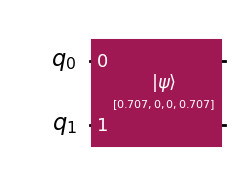

In [36]:
circuit.draw("mpl")

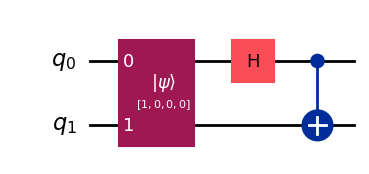

In [37]:
circuit2.draw("mpl")

**Exercise 4:** do the same as before by using the mixed states corresponding to the Bell states. Comment on the differences in the density matrices.

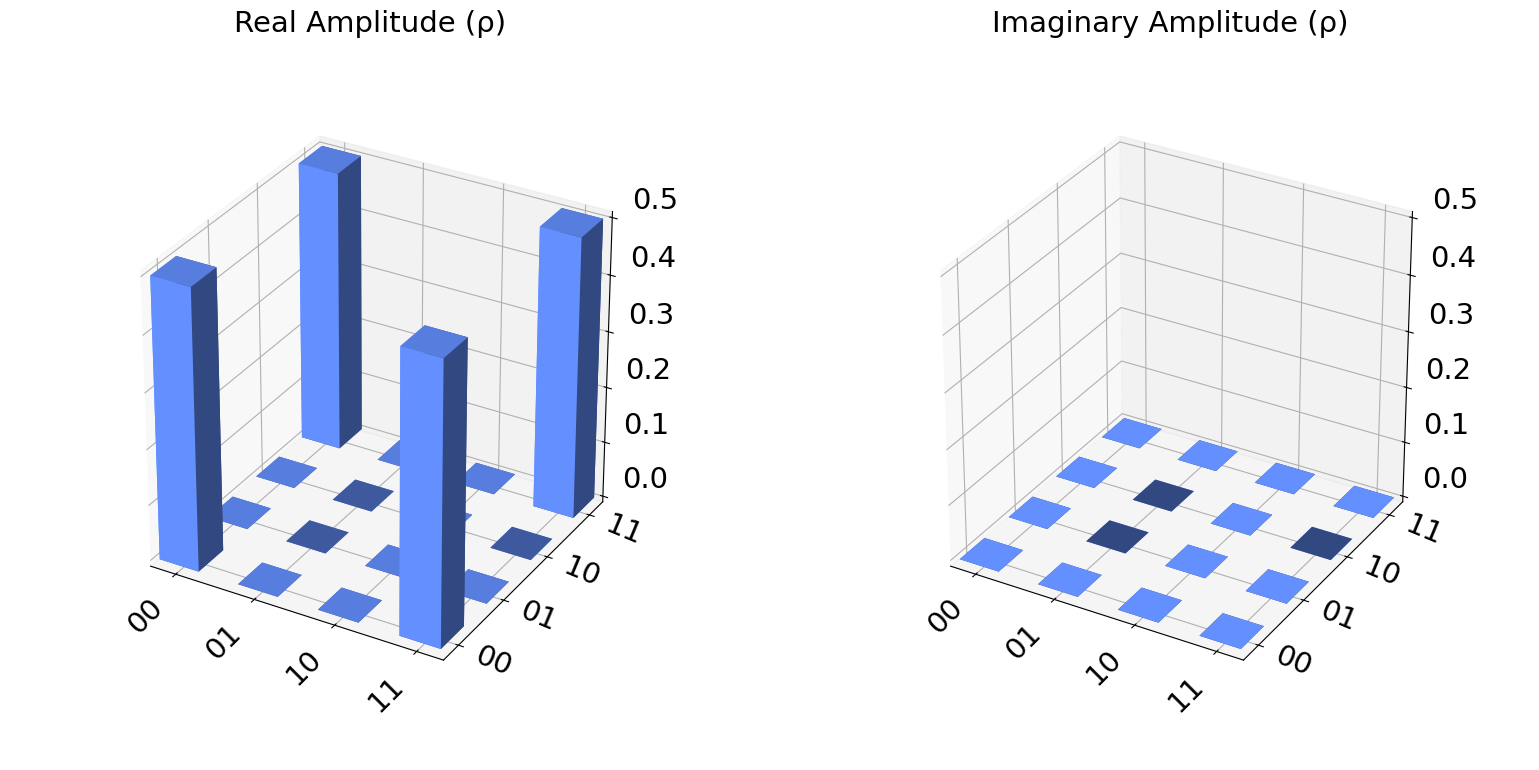

In [38]:
# Build the desity matrices
dm1 = DensityMatrix(circuit2)

# display the density matrix
plot_state_city(dm1)

**Exercise 3:** Add measurements to the circuit. Use the statevector simulator (linear algebra of the states and the unitaries) to simulate the output of the circuit. Perform measurements on the computational basis and on the $|+\rangle$ and $|-\rangle$ basis. Try this for all Bell states.

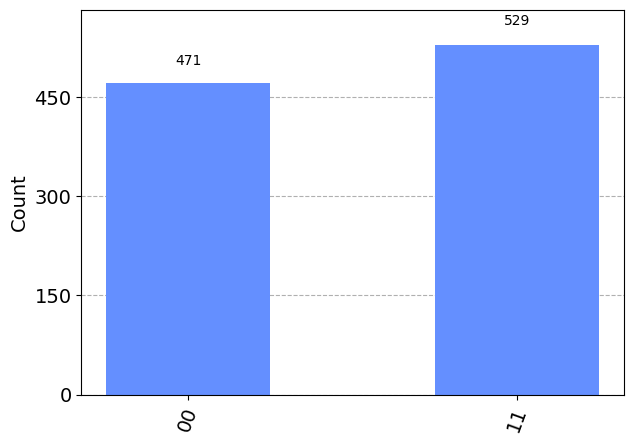

In [92]:
# Create a quantum circuit with two qubits and initialize it
qc = QuantumCircuit(2)

# change the basis to the Bell states
qc.initialize([1,0,0,0], normalize=True) # 00
qc.h(0) # N(0 + 1)(0) = N(00, 10)
qc.cx(0,1) # |-> N(00, 11)

# add the Hadamards to change basis to | + >,| - >
# since 
# + = N(0 + 1)
# - = N(0 - 1)
qc.h(0) # N(0 + 1 )(0) N(0 - 1 )(1)
qc.h(1) # NN(0 + 1 )(0 + 1) + NN(0 - 1)(0 - 1) = (++) + (--)


# add the measurement
#qc.measure_all()
#qc.add_register(qiskit.ClassicalRegister(1))
#qc.measure(0,0)
qc.measure_all()

# Simulate the circuit using the statevector simulator

backend = Aer.get_backend('statevector_simulator')
simulation = backend.run(qc, shots = 1000)
simulation.result().get_counts()

# print the circuit and plot the hystograms of results
plot_histogram(simulation.result().get_counts())

In [48]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [47]:
Statevector(qc)

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


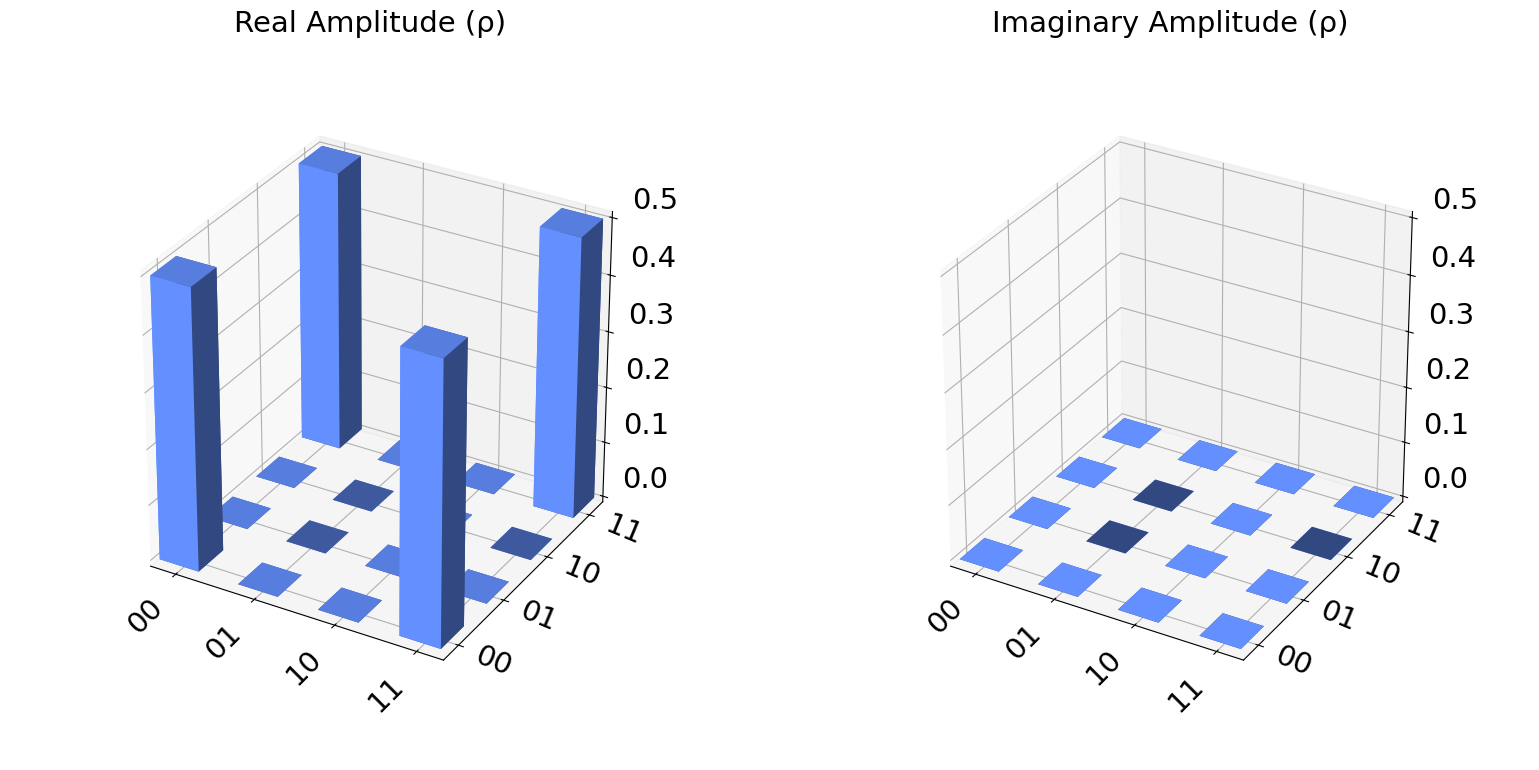

In [41]:
circuit2 = QuantumCircuit(2)
circuit2.initialize([1,0,0,1], normalize=True)
dm2 = DensityMatrix(circuit2)
circuit3 = QuantumCircuit(2)
circuit3.initialize([1,0,0,-1], normalize=True)
dm3 = DensityMatrix(circuit3)
circuit4 = QuantumCircuit(2)
circuit4.initialize([0,1,1,0], normalize=True)
dm4 = DensityMatrix(circuit4)
circuit5 = QuantumCircuit(2)
circuit5.initialize([0,1,-1,0], normalize=True)
dm5 = DensityMatrix(circuit5)

print(Statevector(circuit1))
plot_state_city(dm1)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


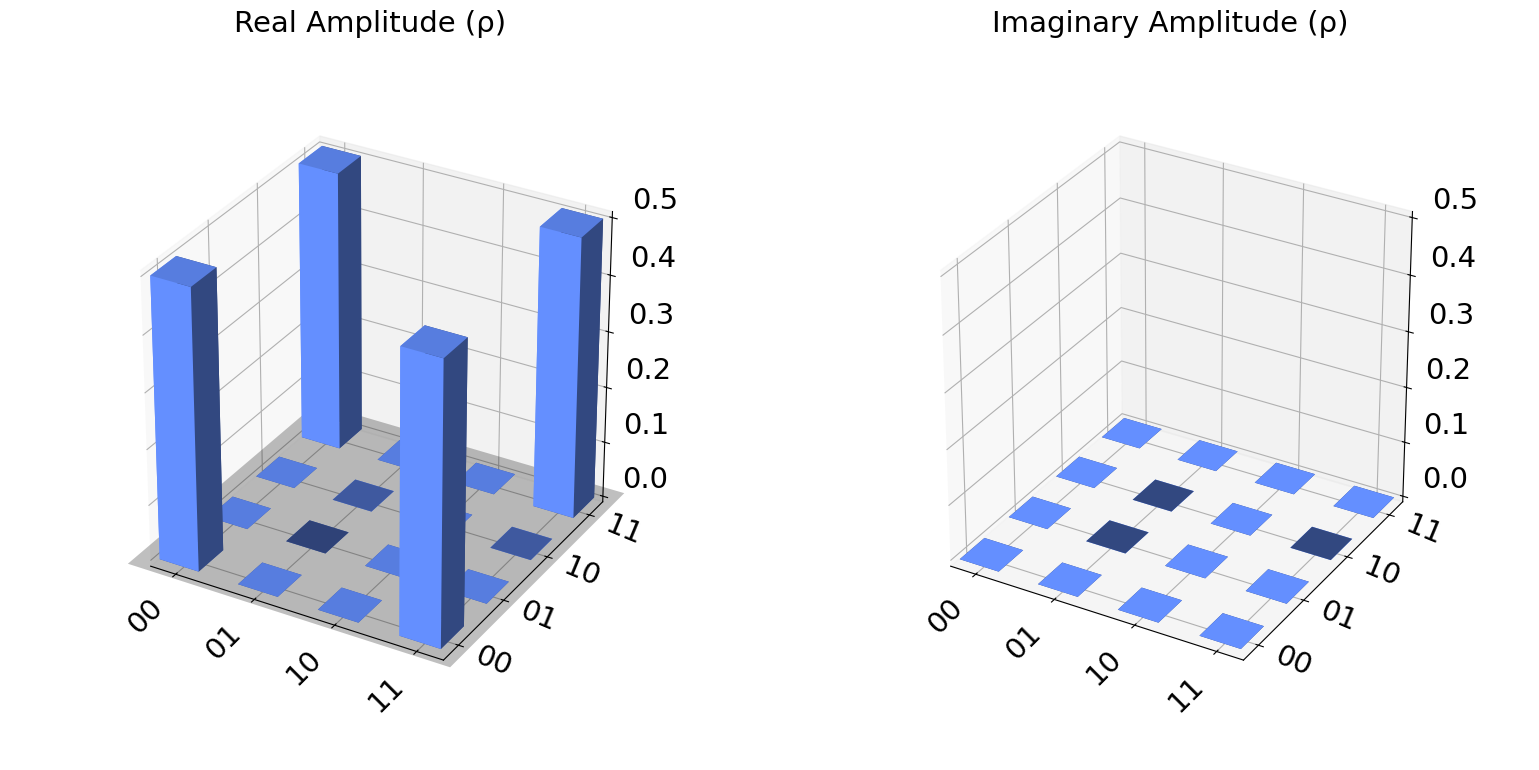

In [43]:
print(Statevector(circuit2))
plot_state_city(dm2)

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


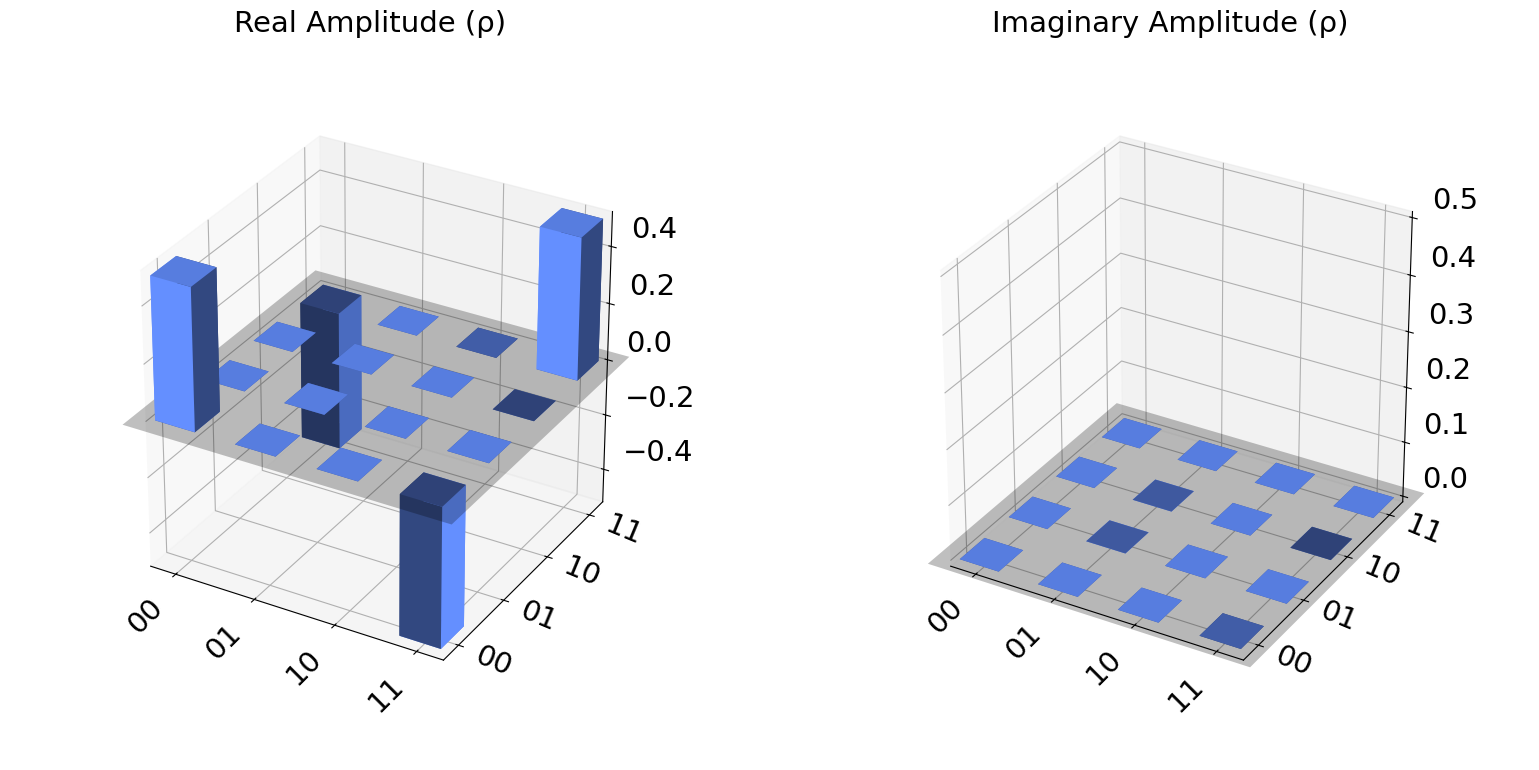

In [44]:
print(Statevector(circuit3))
plot_state_city(dm3)

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


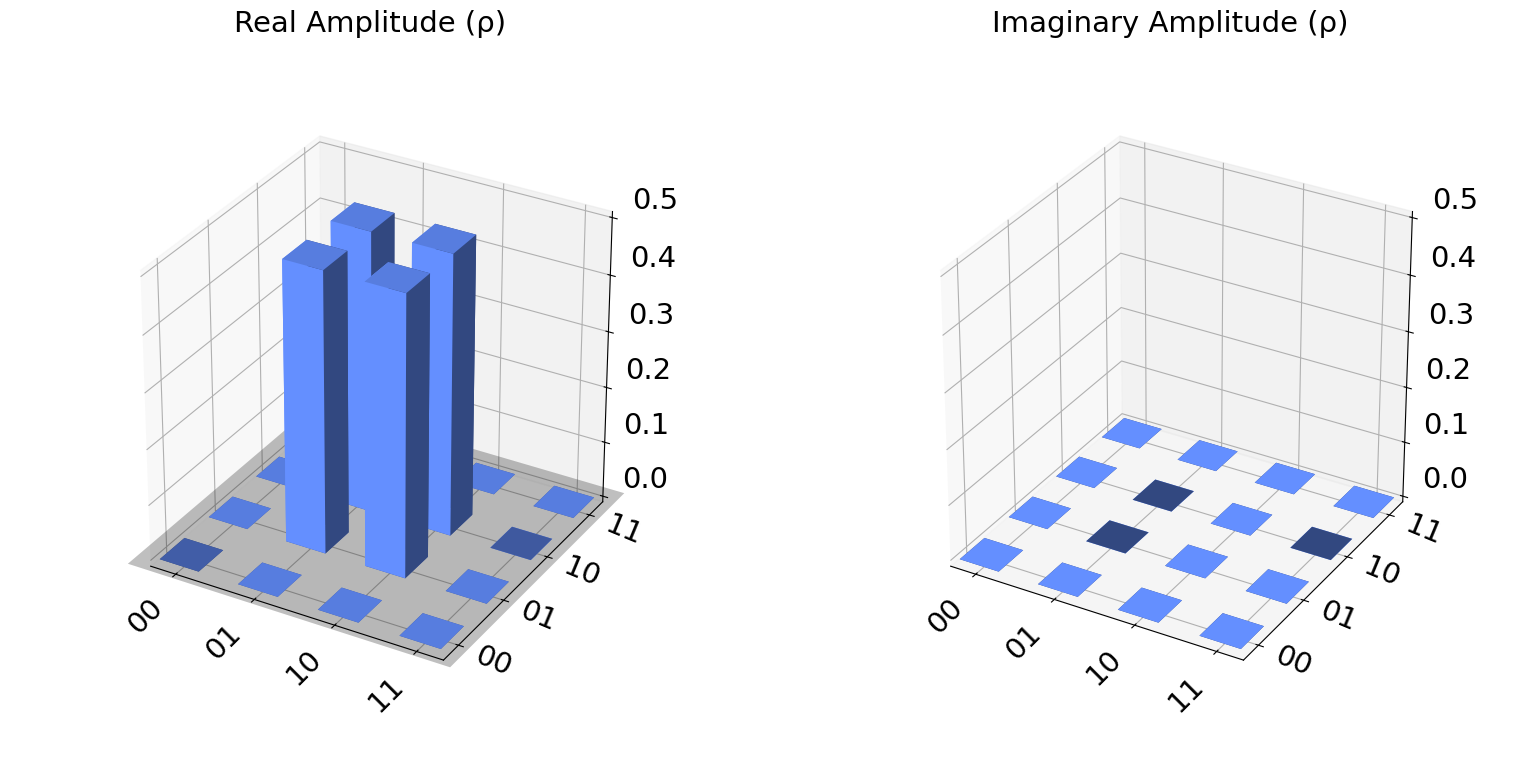

In [45]:
print(Statevector(circuit4))
plot_state_city(dm4)

# **Exercise 4:**  
Rewrite by hand the Bell states on the $|+\rangle$ and $|-\rangle$ basis. Comment the previous results in the light of what you have found. 

**Hint:** Remember that $|0\rangle=\frac{1}{\sqrt{2}}\left(|+\rangle+|-\rangle\right)$ and $|1\rangle=\frac{1}{\sqrt{2}}\left(|+\rangle-|-\rangle\right)$.

In [ ]:
|+ > = N(|0> + |1>)
|- > = N(|0> - |1>)

N(10 - 01) ->
N(10 + 01) -> 
N(01 + 10) ->
N(01 - 10) ->

**Exercise 5:** Build a quantum circuit to generate the Greenberger–Horne–Zeilinger state $|GHZ\rangle=\frac{1}{\sqrt{2}}\left(|000\rangle+|111\rangle\right)$ and represent its density matrix.

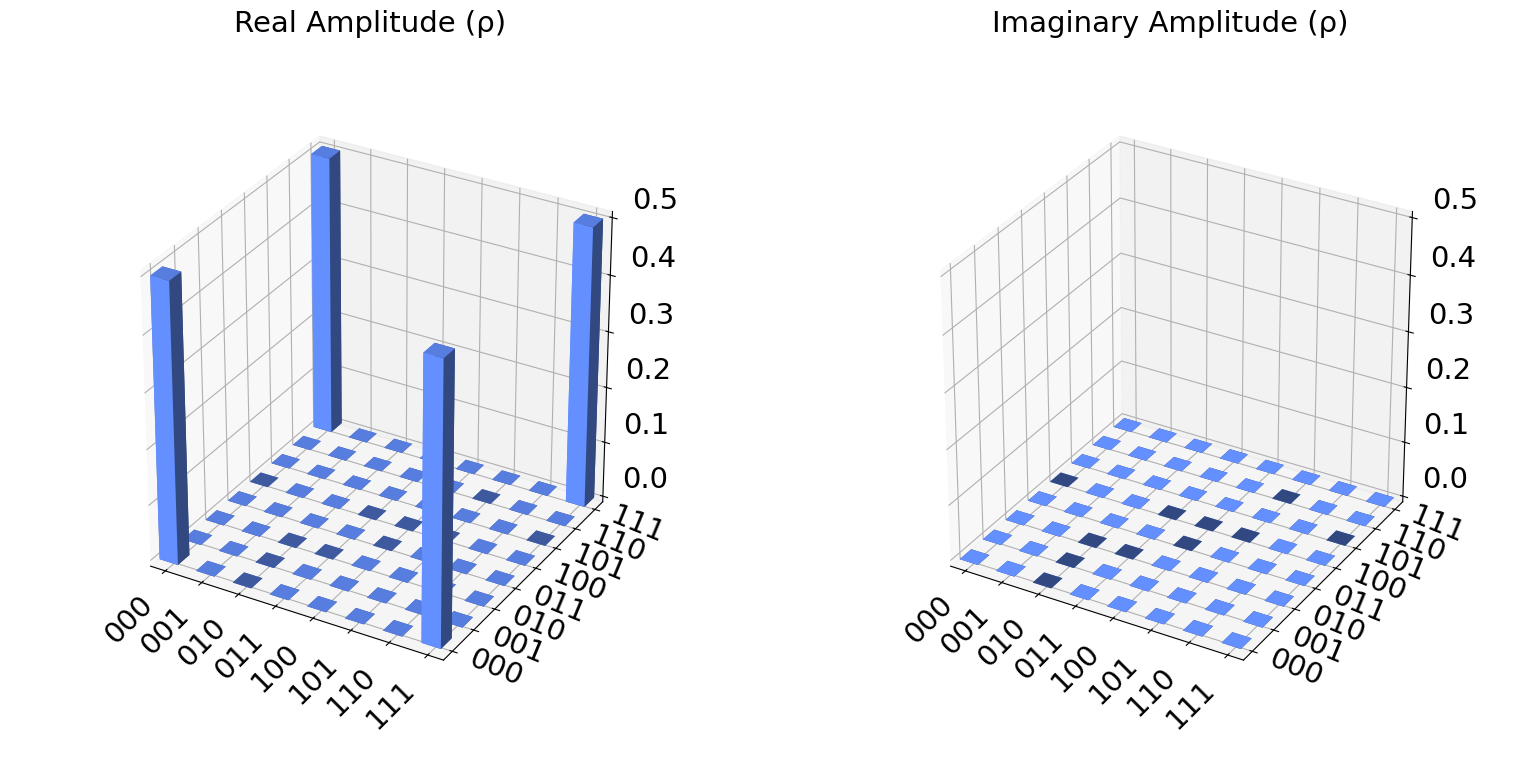

In [17]:
qc5 = QuantumCircuit(3)
qc5.initialize([1,0,0,0,0,0,0,0], normalize=True)
qc5.h(0)
qc5.cx(0,1)
qc5.cx(0,2)
qc5.draw('mpl')
st5 = Statevector(qc5)
plot_state_city(st5)

**Exercise 6:** Do the same for the W state $|W\rangle=\frac{1}{\sqrt{3}}\left(|001\rangle+|010\rangle+|100⟩\right)$ using the circuit in the figure. The angle of the y rotation isc$\phi_3 = 2\arccos\left(\frac{1}{\sqrt{3}}\right)$. To implement the controlled Hadamard gate use the to_gate method of a quantum circuit adding one control.![picture](https://upload.wikimedia.org/wikipedia/commons/3/34/Wstate_quantumcircuit.png)

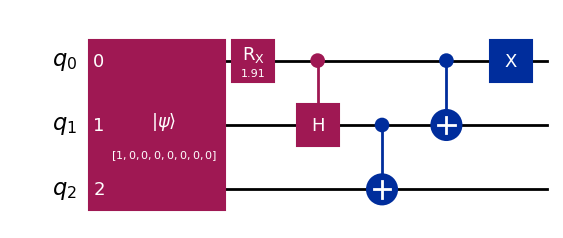

In [14]:
qc6 = QuantumCircuit(3)
qc6.initialize([1,0,0,0,0,0,0,0], normalize=True)

theta = 2 * np.arccos(1 / np.sqrt(3))
qc6.rx(theta, 0)
qc6.ch(0, 1)
qc6.cx(1, 2)
qc6.cx(0, 1)
qc6.x(0)

qc6.draw('mpl')